In [28]:
# Manipulação e Visualização de Dados
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
df_churn = pd.read_csv('../data/customer_churn_telecom_services.csv')

In [30]:
# Seleciona as colunas que todos valores da coluna são únicos, ou seja, número de ocorrência de valores únicos igual a número de ocorrência de valores
col_iden = [col for col in df_churn.columns if df_churn[col].nunique() == df_churn[col].notna().sum()]
if col_iden:
    print("Colunas identificadoras detectadas:", col_iden)
else:
    print("Nenhuma coluna identificadora detectada.")

Nenhuma coluna identificadora detectada.


In [31]:
num_dupli = df_churn.duplicated().sum()
print("Número de linhas duplicadas:", num_dupli)

Número de linhas duplicadas: 22


In [32]:
df_churn[df_churn.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [33]:
df_churn[df_churn.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [34]:
df_churn.loc[df_churn['tenure'] == 0, 'TotalCharges'] = 0

In [35]:
# Identificar colunas numéricas e categóricas
col_num = df_churn.select_dtypes(include=['int64', 'float64']).columns
col_cat = df_churn.select_dtypes(include=['object', 'category']).columns

# Preencher colunas numéricas com a mediana
for col in col_num:
    if df_churn[col].isnull().sum() > 0:
        med = df_churn[col].median()
        df_churn[col].fillna(med, inplace=True)
        print(f"Coluna '{col}' preenchida com a mediana: {med}")

# Preencher colunas categóricas com a moda
for col in col_cat:
    if df_churn[col].isnull().sum() > 0:
        mode = col_cat[col].mode()[0]
        df_churn[col].fillna(mode, inplace=True)
        print(f"Coluna '{col}' preenchida com a moda: {mode}")

In [36]:
col_cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [37]:
# mapping = {"No": 0, "No internet service": 0, "Yes": 1}
# df_churn = df_churn.map(lambda x: mapping.get(x, x))

In [38]:
# mapeamento que você já tem
mapping = {
    "No": 0,
    "No internet service": 0,
    "Yes": 1
}

# 1) identificar colunas object ou category cujos valores são subset de Yes/No/No internet service
binary_cols = [
    col for col in df_churn.columns
    if df_churn[col].dtype.name in ("object", "category")
    and set(df_churn[col].dropna().unique()).issubset(mapping.keys())
]

# 2) aplicar o replace + cast para inteiro
df_churn[binary_cols] = (
    df_churn[binary_cols]
    .replace(mapping)      # mapeia as strings para 0/1
    .astype(int)           # converte o resultado pra inteiro
)

# pronto: só as colunas Yes/No foram convertidas, as outras ficaram intactas
print(df_churn[binary_cols].dtypes)

Partner             int32
Dependents          int32
PhoneService        int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
PaperlessBilling    int32
Churn               int32
dtype: object


C:\Users\hyggo\AppData\Local\Temp\ipykernel_23268\3058725609.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_churn[binary_cols]


'No internet service' foi considerado 0

In [39]:
# Parâmetros de divisão
TARGET = "Churn"
VAL_SIZE = 0.3
TEST_SIZE = 0.3
RANDOM_STATE = 42

df_embaralhado = df_churn.sample(frac=1).reset_index(drop=True)

# Features e target
X = df_embaralhado.drop(columns=[TARGET])
y = df_embaralhado[TARGET]

# # 1º Split TRAIN (40%) | VAL + TEST (60%)
# test_val_frac = VAL_SIZE + TEST_SIZE

# X_train, X_temp, y_train, y_temp = train_test_split( X, y, test_size=test_val_frac, random_state=RANDOM_STATE)

# # 2º Split VAL (30%) | TEST (30%)
# test_frac_of_temp = TEST_SIZE / test_val_frac

# X_val, X_test, y_val, y_test = train_test_split( X_temp, y_temp, test_size=test_frac_of_temp, random_state=RANDOM_STATE)

# 1) hold out 20% as “test”
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# 2) split the remaining 80% into train (60% of original) and val (20% of original)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.40,       # 0.25 * 0.80 = 0.20 of the original
    stratify=y_temp,
    random_state=42
)

In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Identifica colunas numéricas e categóricas
numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Cria um ColumnTransformer que aplica StandardScaler nas numéricas
# e OneHotEncoder nas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(sparse=False, handle_unknown="ignore"), categorical_cols),
    ]
)

X_train_arr = preprocessor.fit_transform(X_train)
X_val_arr   = preprocessor.transform(X_val)
X_test_arr  = preprocessor.transform(X_test)

# extrai nomes das colunas já escalonadas e one‑hot‑encodadas
feature_names = preprocessor.get_feature_names_out()

# cria DataFrames pandas com esses nomes
X_train_prep = pd.DataFrame(X_train_arr, columns=feature_names)
X_val_prep   = pd.DataFrame(X_val_arr,   columns=feature_names)
X_test_prep  = pd.DataFrame(X_test_arr,  columns=feature_names)

# oversampling no train
smote = SMOTE(random_state=42, 
    sampling_strategy=0.5, 
    k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train)

# opcionalmente, garanta que o índice de y_* comece em 0
y_train_idx = y_train_res.reset_index(drop=True)
y_val_idx   = y_val.reset_index(drop=True)
y_test_idx  = y_test.reset_index(drop=True)

# concatena features + target
train_df = pd.concat([X_train_res, y_train_idx.rename(TARGET)], axis=1)
val_df   = pd.concat([X_val_prep,   y_val_idx.rename(TARGET)],   axis=1)
test_df  = pd.concat([X_test_prep,  y_test_idx.rename(TARGET)],  axis=1)

# salva tudo num CSV só
train_df.to_csv('../data/fold1.csv', index=False, encoding='utf-8')
val_df.  to_csv('../data/fold2.csv',   index=False, encoding='utf-8')
test_df. to_csv('../data/fold3.csv',  index=False, encoding='utf-8')

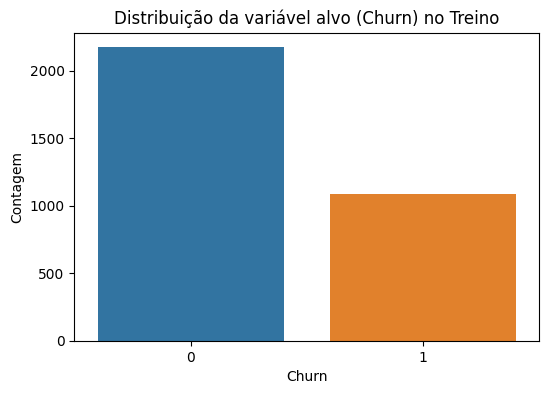

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(
    x="Churn",
    hue="Churn",
    data=train_df,
    palette="tab10",      
    legend=False          
)
plt.title("Distribuição da variável alvo (Churn) no Treino")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()
